In [548]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

##### Loading Datasets

In [549]:
single_family_df = pd.read_csv("data/State_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv")
all_homes_df = pd.read_csv("data/ZHV All homes Smoothed Forecast.csv")


##### Showing data

In [550]:
print("Single Family: ")
display(single_family_df.head(5))

print("All Homes: ")
display(all_homes_df.head(5))

Single Family: 


,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,9,0,California,state,NaN,189941.083557,190575.156948,191424.465351,193265.350054,195397.239796,...,767990.199085,767913.074896,769512.186358,773759.709911,778647.153064,781489.116381,783680.716030,785600.537660,787971.516726,789682.973337
1,54,1,Texas,state,NaN,111027.321208,111084.902957,111112.748505,111257.301986,111349.721806,...,299951.648526,300228.058078,301109.030655,301978.572060,302324.101841,302112.969026,301577.999813,301188.651460,300952.088105,300712.091402
2,14,2,Florida,state,NaN,113269.221141,113522.494633,113824.724865,114430.520208,115078.630576,...,412975.408432,413904.071012,414944.203899,415862.795269,416209.388878,415619.551410,414758.879266,413927.429781,413257.280087,412469.692485
3,43,3,New York,state,NaN,138979.501439,139444.664549,139897.446908,140878.333994,141899.073549,...,436255.509091,438648.840664,441631.820433,445308.012700,448638.592263,451330.079925,453622.474786,456378.737780,459093.248515,461615.264629
4,47,4,Pennsylvania,state,NaN,99325.159675,99534.907545,99734.576999,100139.362023,100552.787955,...,262071.016367,262933.274907,264263.880571,265948.793081,267456.133235,268371.119451,268732.316321,269001.236812,269407.285863,270173.074129


All Homes: 


,RegionID,SizeRank,RegionName,RegionType,StateName,BaseDate,2024-11-30,2025-01-31,2025-10-31
0,102001,0,United States,country,NaN,2024-10-31,0.2,0.6,2.9
1,394913,1,"New York, NY",msa,NY,2024-10-31,0.3,0.5,1.5
2,753899,2,"Los Angeles, CA",msa,CA,2024-10-31,0.2,0.4,2.3
3,394463,3,"Chicago, IL",msa,IL,2024-10-31,0.1,0.2,1.1
4,394514,4,"Dallas, TX",msa,TX,2024-10-31,-0.2,-0.7,1.2


In [551]:
print("Single Family: ")
display(single_family_df.tail(5))

print("All Homes: ")
display(all_homes_df.tail(5))

Single Family: 


,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
46,37,47,North Dakota,state,NaN,NaN,NaN,NaN,NaN,NaN,...,258046.945000,258196.872696,259649.354761,261542.187582,263077.869575,264304.543043,265336.741993,266250.209682,267047.587869,268007.903515
47,3,48,Alaska,state,NaN,135123.098557,135355.337187,135446.255981,135622.003071,135794.421166,...,368273.980915,369224.868438,370748.305928,371891.786888,372840.605453,373486.607926,373725.505066,373857.108571,374443.501187,375773.963522
48,12,49,District of Columbia,state,NaN,181591.414212,181990.032640,182670.910303,184198.672071,186029.977610,...,716912.553944,715995.390935,716772.957431,718160.637308,717777.184144,714288.229978,710489.606792,706989.450227,706641.608451,706313.617085
49,58,50,Vermont,state,NaN,114573.573888,114746.984203,115038.062219,115608.880655,116285.603386,...,389369.322394,388528.573156,389362.674568,391741.536805,393975.412098,395515.983557,395250.319468,394880.821828,394022.349713,393578.894823
50,62,51,Wyoming,state,NaN,NaN,NaN,NaN,NaN,NaN,...,341036.904110,341298.527667,342517.679679,344115.919408,345460.227042,346223.223400,346761.950907,348183.688728,350496.641190,353292.846225


All Homes: 


,RegionID,SizeRank,RegionName,RegionType,StateName,BaseDate,2024-11-30,2025-01-31,2025-10-31
890,753929,935,"Zapata, TX",msa,TX,2024-10-31,-0.8,-2.6,-7.2
891,394743,936,"Ketchikan, AK",msa,AK,2024-10-31,0.2,0.1,-0.9
892,753874,937,"Craig, CO",msa,CO,2024-10-31,0.4,1.0,4.4
893,395188,938,"Vernon, TX",msa,TX,2024-10-31,-1.4,-2.2,-4.3
894,394767,939,"Lamesa, TX",msa,TX,2024-10-31,-0.2,-0.7,-4.5


##### Drop Columns

In [552]:
single_family_df = single_family_df.drop(columns=["StateName"])

##### Data types

In [553]:
print("Single Family: ")
display(single_family_df.dtypes)

print("All Homes: ")
display(all_homes_df.dtypes)



Single Family: 


RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
2000-01-31    float64
               ...   
2024-06-30    float64
2024-07-31    float64
2024-08-31    float64
2024-09-30    float64
2024-10-31    float64
Length: 302, dtype: object

All Homes: 


RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
BaseDate       object
2024-11-30    float64
2025-01-31    float64
2025-10-31    float64
dtype: object

##### Data Shape

In [554]:
print("Single Family: ")
display(single_family_df.shape)

print("All Homes: ")
display(all_homes_df.shape)



Single Family: 


(51, 302)

All Homes: 


(895, 9)

##### Data Count

In [555]:
print("Single Family: ")
display(single_family_df.count())

print("All Homes: ")
display(all_homes_df.count())

Single Family: 


RegionID      51
SizeRank      51
RegionName    51
RegionType    51
2000-01-31    47
              ..
2024-06-30    51
2024-07-31    51
2024-08-31    51
2024-09-30    51
2024-10-31    51
Length: 302, dtype: int64

All Homes: 


RegionID      895
SizeRank      895
RegionName    895
RegionType    895
StateName     894
BaseDate      895
2024-11-30    895
2025-01-31    895
2025-10-31    895
dtype: int64

##### Drop Duplicates

In [556]:
single_family_df = single_family_df.drop_duplicates()
print("Single Family: ")
display(single_family_df.head(5))

all_homes_df = all_homes_df.drop_duplicates()
print("All Homes: ")
display(all_homes_df.head(5))





Single Family: 


,RegionID,SizeRank,RegionName,RegionType,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,9,0,California,state,189941.083557,190575.156948,191424.465351,193265.350054,195397.239796,197695.254730,...,767990.199085,767913.074896,769512.186358,773759.709911,778647.153064,781489.116381,783680.716030,785600.537660,787971.516726,789682.973337
1,54,1,Texas,state,111027.321208,111084.902957,111112.748505,111257.301986,111349.721806,111452.895994,...,299951.648526,300228.058078,301109.030655,301978.572060,302324.101841,302112.969026,301577.999813,301188.651460,300952.088105,300712.091402
2,14,2,Florida,state,113269.221141,113522.494633,113824.724865,114430.520208,115078.630576,115734.485011,...,412975.408432,413904.071012,414944.203899,415862.795269,416209.388878,415619.551410,414758.879266,413927.429781,413257.280087,412469.692485
3,43,3,New York,state,138979.501439,139444.664549,139897.446908,140878.333994,141899.073549,143006.421386,...,436255.509091,438648.840664,441631.820433,445308.012700,448638.592263,451330.079925,453622.474786,456378.737780,459093.248515,461615.264629
4,47,4,Pennsylvania,state,99325.159675,99534.907545,99734.576999,100139.362023,100552.787955,100975.065674,...,262071.016367,262933.274907,264263.880571,265948.793081,267456.133235,268371.119451,268732.316321,269001.236812,269407.285863,270173.074129


All Homes: 


,RegionID,SizeRank,RegionName,RegionType,StateName,BaseDate,2024-11-30,2025-01-31,2025-10-31
0,102001,0,United States,country,NaN,2024-10-31,0.2,0.6,2.9
1,394913,1,"New York, NY",msa,NY,2024-10-31,0.3,0.5,1.5
2,753899,2,"Los Angeles, CA",msa,CA,2024-10-31,0.2,0.4,2.3
3,394463,3,"Chicago, IL",msa,IL,2024-10-31,0.1,0.2,1.1
4,394514,4,"Dallas, TX",msa,TX,2024-10-31,-0.2,-0.7,1.2


In [557]:
print("Single family: ")
display(single_family_df.count())

print("All Homes: ")
display(all_homes_df.count())

Single family: 


RegionID      51
SizeRank      51
RegionName    51
RegionType    51
2000-01-31    47
              ..
2024-06-30    51
2024-07-31    51
2024-08-31    51
2024-09-30    51
2024-10-31    51
Length: 302, dtype: int64

All Homes: 


RegionID      895
SizeRank      895
RegionName    895
RegionType    895
StateName     894
BaseDate      895
2024-11-30    895
2025-01-31    895
2025-10-31    895
dtype: int64

In [558]:
# We have determined that there are no duplicates  so lets check for null values 
print("Single Family: ")
display(single_family_df.isnull().sum())

print("All Homes: ")
display(all_homes_df.isnull().sum())

Single Family: 


RegionID      0
SizeRank      0
RegionName    0
RegionType    0
2000-01-31    4
             ..
2024-06-30    0
2024-07-31    0
2024-08-31    0
2024-09-30    0
2024-10-31    0
Length: 302, dtype: int64

All Homes: 


RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     1
BaseDate      0
2024-11-30    0
2025-01-31    0
2025-10-31    0
dtype: int64

In [559]:
single_family_df = single_family_df.dropna()
print("Single Family: ")
display(single_family_df.isnull().sum())

all_homes_df = all_homes_df.dropna()
print("All Homes: ")
display(all_homes_df.isnull().sum())

Single Family: 


RegionID      0
SizeRank      0
RegionName    0
RegionType    0
2000-01-31    0
             ..
2024-06-30    0
2024-07-31    0
2024-08-31    0
2024-09-30    0
2024-10-31    0
Length: 302, dtype: int64

All Homes: 


RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     0
BaseDate      0
2024-11-30    0
2025-01-31    0
2025-10-31    0
dtype: int64

##### Showing Recent Growth Rates by states (2023-2024)

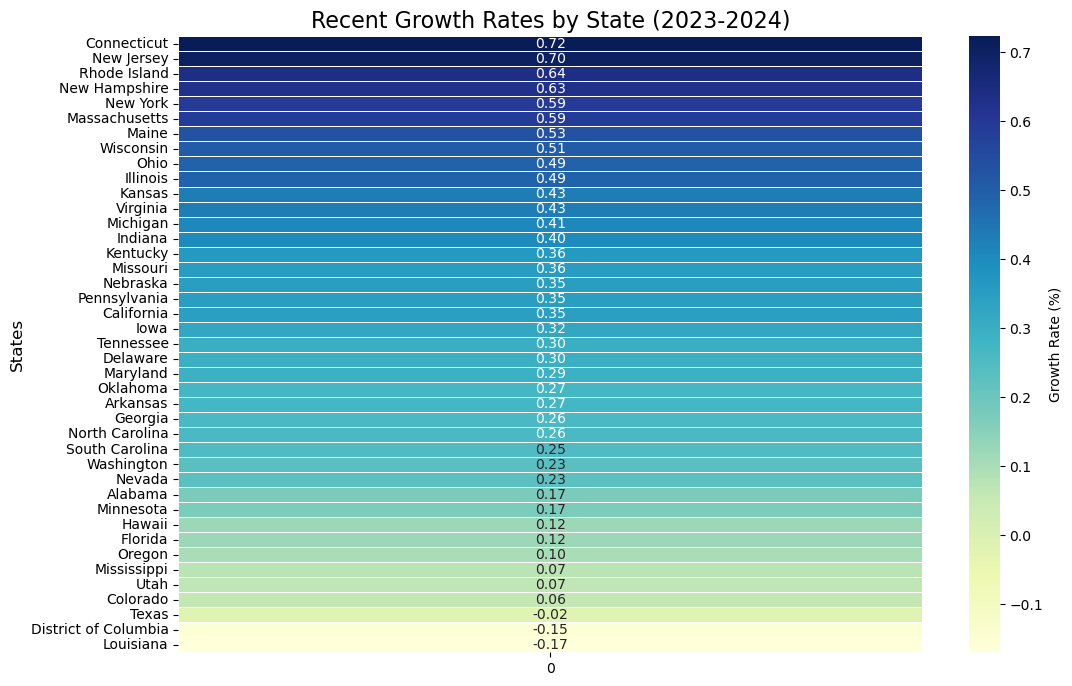

In [566]:

# Process the data to calculate recent growth rates
price_data = single_family_df.drop(['RegionID', 'SizeRank', 'RegionName', 'RegionType'], axis=1).T
price_data.columns = single_family_df['RegionName']
price_data.index = pd.to_datetime(price_data.index, errors='coerce')

# Calculate growth rates for 2023-2024
recent_growth = price_data.loc['2023-01-31':].pct_change().mean() * 100

# Sort states by growth rates
sorted_growth = recent_growth.sort_values(ascending=False)

# Create and display the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sorted_growth.to_frame(), annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Growth Rate (%)'}, linewidths=0.5)
plt.title("Recent Growth Rates by State (2023-2024)", fontsize=16)
plt.xlabel("")
plt.ylabel("States", fontsize=12)
plt.xticks(rotation=0)
plt.show()





##### All Homes Overview

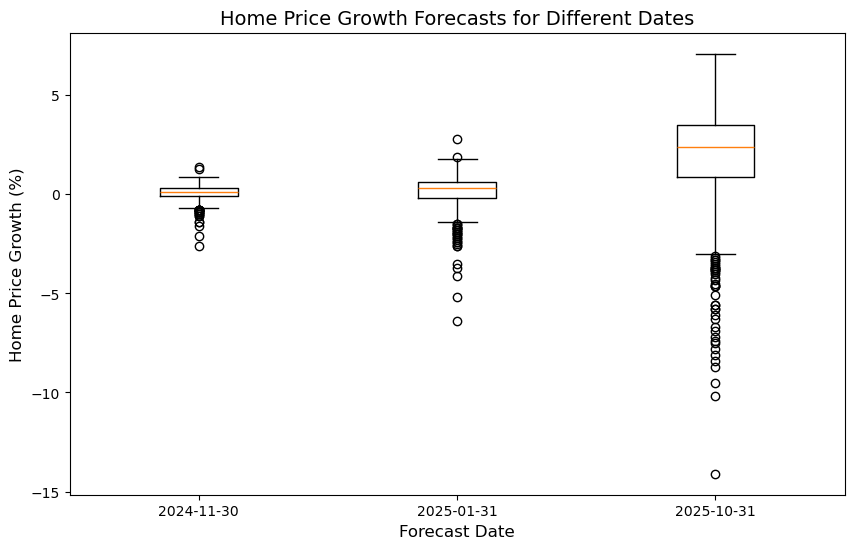

In [561]:


# Define the columns representing home price growth
growth_columns = ['2024-11-30', '2025-01-31', '2025-10-31']

# Set up the plot
plt.figure(figsize=(10, 6))

# Create box plots for each growth column
plt.boxplot([all_homes_df[column] for column in growth_columns], labels=growth_columns)

# Add a title and labels
plt.title('Home Price Growth Forecasts for Different Dates', fontsize=14)
plt.xlabel('Forecast Date', fontsize=12)
plt.ylabel('Home Price Growth (%)', fontsize=12)

# Show the boxplot
plt.show()



#### Calculating All Homes Average Growth (Nov 2024 onward)

In [562]:

# Load the dataset
#df = pd.read_csv("data/ZHV All homes Smoothed Forecast.csv")

# Define the columns representing home price growth
growth_columns = ['2024-11-30', '2025-01-31', '2025-10-31']

# Calculate average home price growth across the specified columns
all_homes_df['AverageGrowth'] = all_homes_df[growth_columns].mean(axis=1)

# Group by StateName and calculate the mean growth per state
state_growth = all_homes_df.groupby('StateName')['AverageGrowth'].mean().dropna()

# Sort the states by average growth and get the top 10
top_10_states = state_growth.sort_values(ascending=False).head(10)

# Print the top 10 states
display(top_10_states)



StateName
NH    2.440000
NJ    2.283333
ME    2.125000
CT    1.820000
MT    1.666667
RI    1.633333
IN    1.561111
DE    1.500000
ID    1.484615
WI    1.456522
Name: AverageGrowth, dtype: float64

#### All Homes Average Growth for Top 10 States

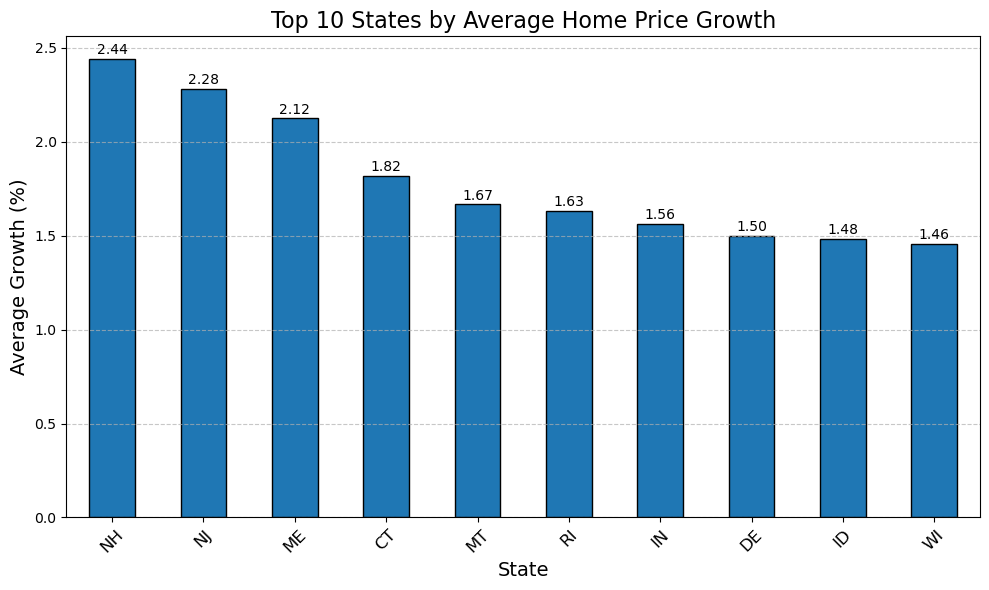

In [563]:
# Create the vertical bar graph
plt.figure(figsize=(10, 6))
bars = top_10_states.plot(kind='bar', edgecolor='black')

# Add numeric labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()  # Get the height of each bar
    plt.text(
        x=bar.get_x() + bar.get_width() / 2,  # X position
        y=height + 0.01,                      # Y position (slightly above the bar)
        s=f'{height:.2f}',                    # Label text
        ha='center',                          # Horizontal alignment
        va='bottom',                          # Vertical alignment
        fontsize=10                           # Font size for labels
    )

# Add titles and labels
plt.title('Top 10 States by Average Home Price Growth', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Growth (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()



##########Assumption
The Election were the cause of the spike of November 2024 
Had no outliers

#### All Homes Growth Forecast

In [564]:
top_10_states.index.tolist()

['NH', 'NJ', 'ME', 'CT', 'MT', 'RI', 'IN', 'DE', 'ID', 'WI']

c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

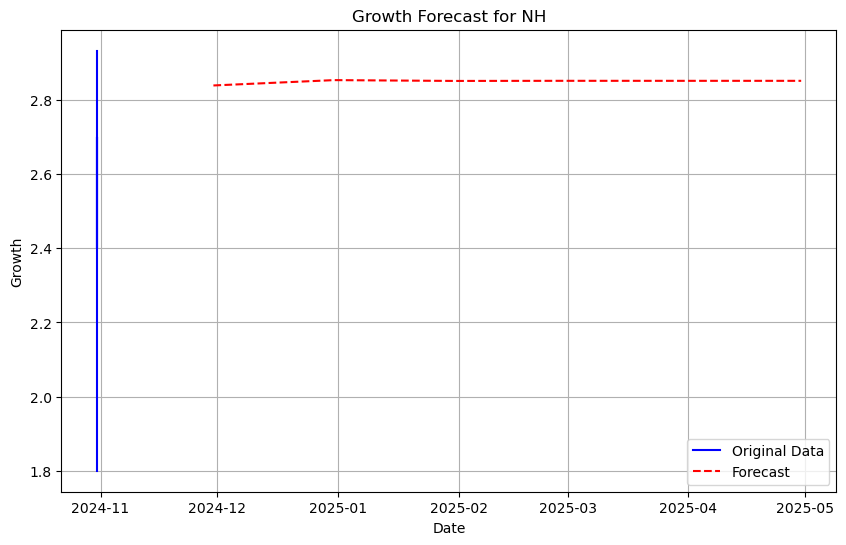

c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too

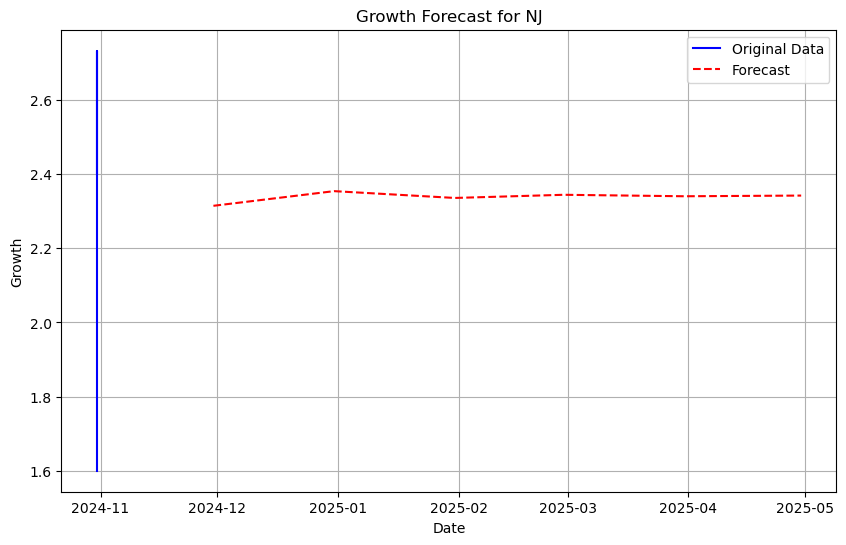

c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too

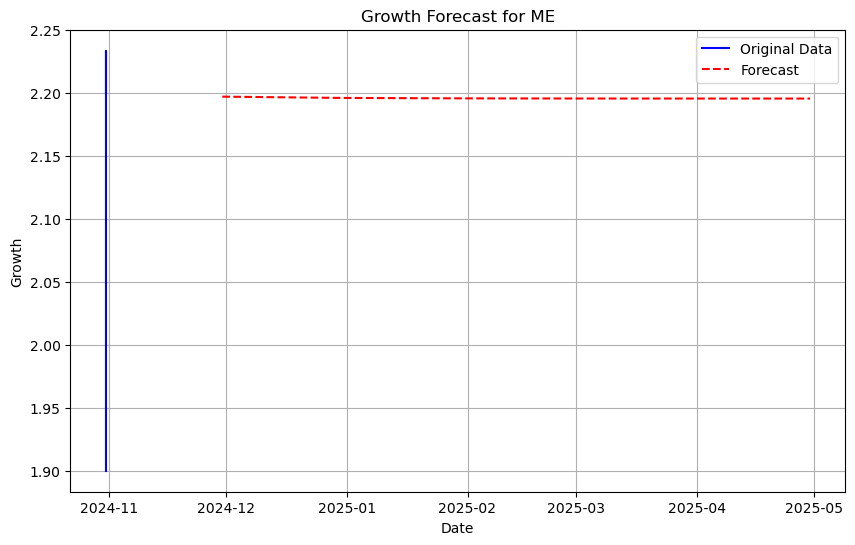

c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

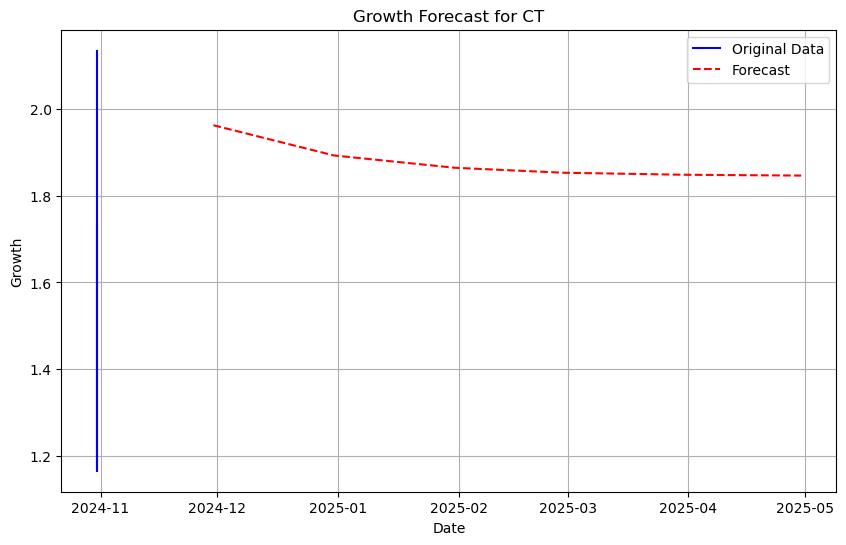

c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

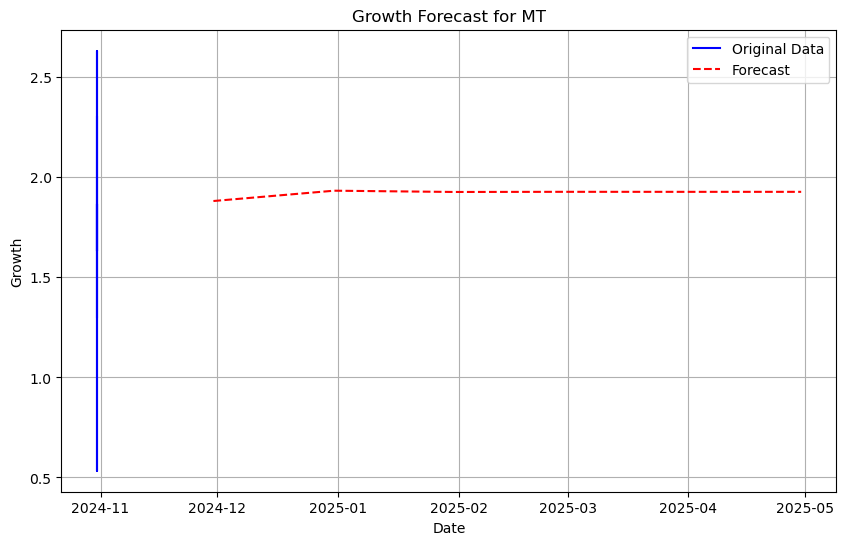

Not enough data to fit ARIMA model for RI


c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

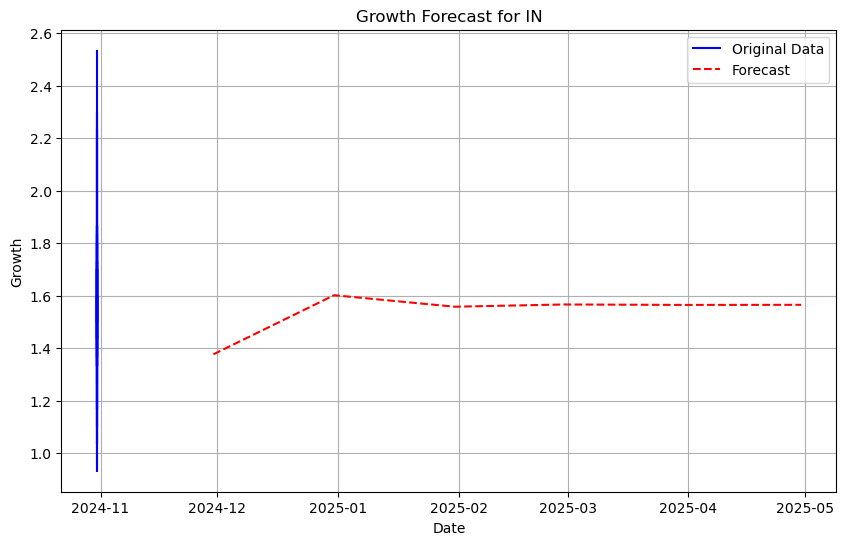

c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

ARIMA model failed for DE: too many indices for array: array is 0-dimensional, but 1 were indexed


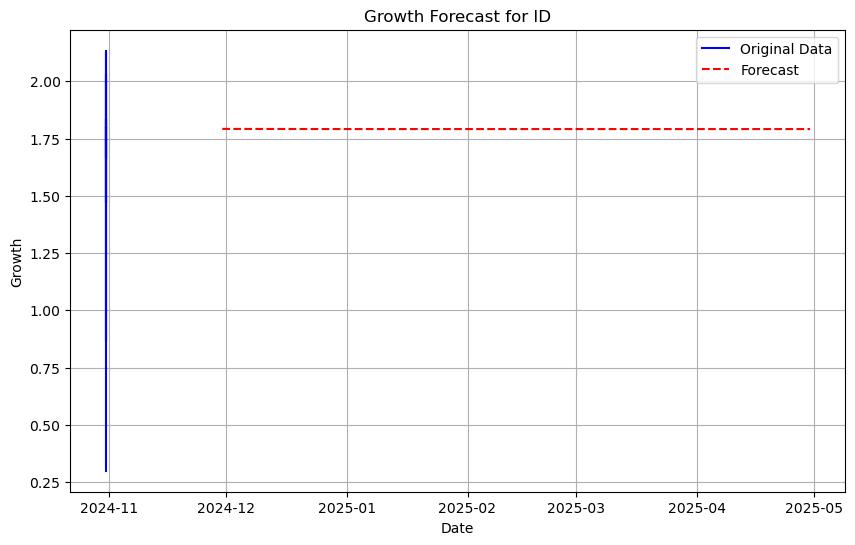

c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sipho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

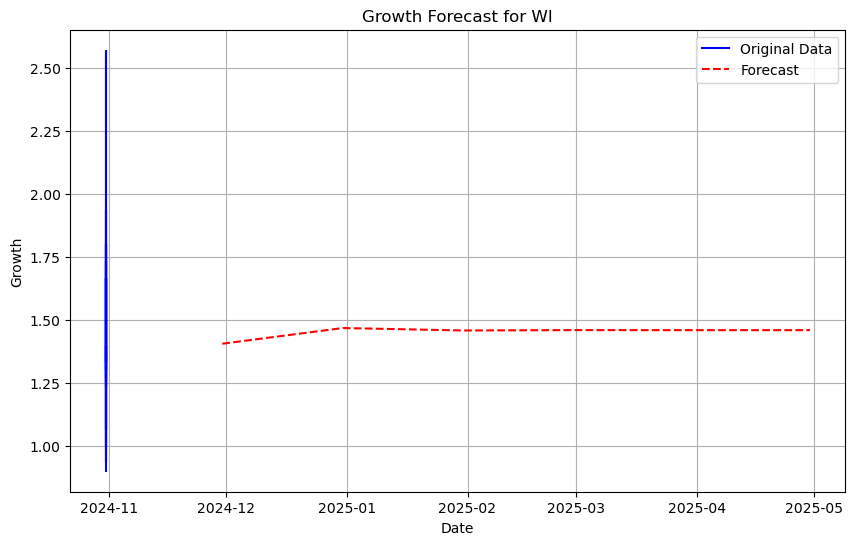

In [565]:
all_homes_data = all_homes_df.copy()

# Ensure 'BaseDate' is in datetime format and sort the data
if 'BaseDate' in all_homes_data.columns:
    
    # Step 1: Convert BaseDate to datetime
    all_homes_data['BaseDate'] = pd.to_datetime(all_homes_data['BaseDate'], errors='coerce')

    # Step 2: Set BaseDate as index
    all_homes_data.set_index('BaseDate', inplace=True)

    # Step 3: Remove duplicate indices
    #all_homes_data = all_homes_data[~all_homes_data.index.duplicated()]

    # Step 4: Define frequency
    #all_homes_data = all_homes_data.asfreq('M')

    # Optional: Fill missing data
    #all_homes_data = all_homes_data.fillna(method='ffill')


# Loop through each top 10 state to forecast growth
for state in top_10_states.index:
    #state_data = top_10_states[top_10_states['StateName'] == state]
    state_data = all_homes_data[all_homes_data["StateName"] == state]

    # Set the 'AverageGrowth' column as the time series and drop missing values
    state_series = state_data['AverageGrowth'].dropna()

    if state_series.empty:
        print(f"No data for {state}")
        continue

    if len(state_series) < 2:
        print(f"Not enough data to fit ARIMA model for {state}")
        continue

    # Fit ARIMA model
    try:
        model = ARIMA(state_series, order=(1, 1, 1))
        model_fit = model.fit()
    except Exception as e:
        print(f"ARIMA model failed for {state}: {e}")
        continue

    # Forecast the next 6 months
    forecast = model_fit.forecast(steps=6)

    # Generate forecast index for the next 6 months
    try:
        forecast_index = pd.date_range(start=state_series.index[-1], periods=7, freq='M')[1:]
    except Exception as e:
        print(f"Error generating forecast index for {state}: {e}")
        continue

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(state_series.index, state_series, label='Original Data', color='blue')
    plt.plot(forecast_index, forecast, label='Forecast', color='red', linestyle='--')
    plt.title(f'Growth Forecast for {state}')
    plt.xlabel('Date')
    plt.ylabel('Growth')
    plt.legend()
    plt.grid(True)
    plt.show()
